In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import pairwise_distances
import skbio
from matplotlib.backends.backend_pdf import PdfPages 
from matplotlib import pylab
import os
from collections import OrderedDict
import scipy as sp

In [24]:
def unique(seq, idfun=None): 
   # order preserving
    if idfun is None:
        def idfun(x): return x
    seen = {}
    result = []
    for item in seq:
        if item != np.nan:
            marker = idfun(item)
            if marker in seen: continue
            seen[marker] = 1
            result.append(item)
    return result

In [101]:
def taxa_composition(otu_table, metadata, pdf, donor):

    donor_ids = list(metadata.index[(metadata["donor_v_patient"]=="donor") & (metadata["donor_num"]==donor)])
    otu_copy = otu_table.copy()
    otu_copy = otu_copy.loc[donor_ids]
    otu_copy["aerobic"] = metadata["anaerobic_proc"]
    otu_copy["pma"] = metadata["pma"]
    otu_copy.index = otu_copy.index.map(mapper=(lambda x: "{}_{}_{}".format(otu_copy.loc[x, "aerobic"], otu_copy.loc[x, "pma"], x)))   
    otu_copy.plot(kind="bar", stacked=True, title=str(int(donor)), legend=False )  
    plt.show()
    return otu_copy
    
    

In [94]:
metadata= pd.read_csv("sample_metadata.csv", index_col=0)
seq_freq_abundance = pd.read_csv("all_filtered_otu_table.csv", index_col=0).transpose().drop(["ndc432", "ndc442"])

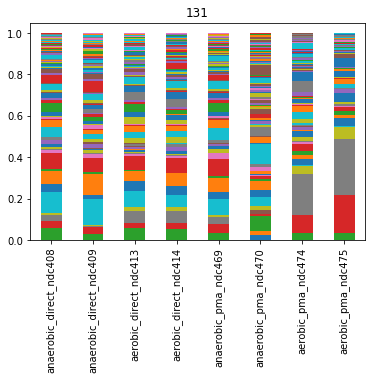

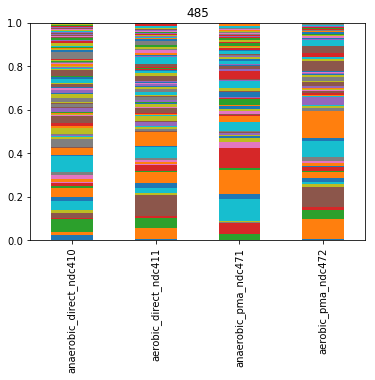

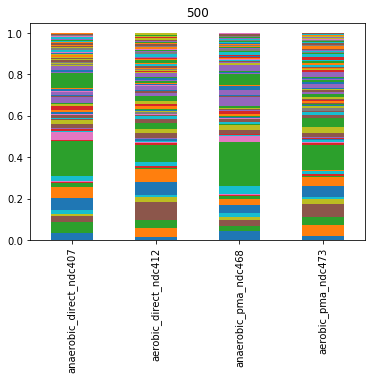

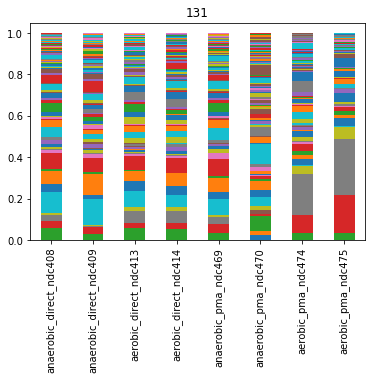

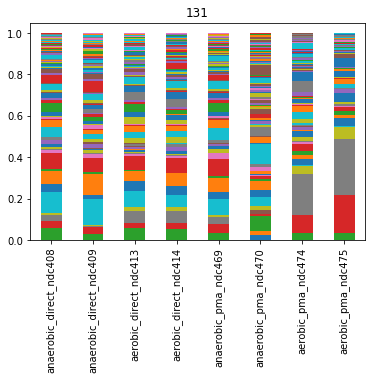

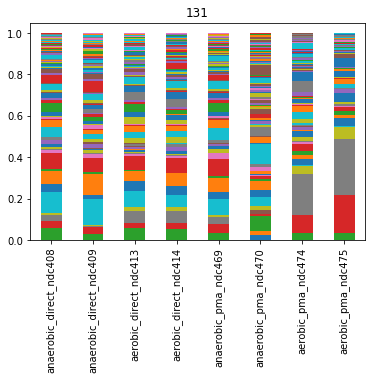

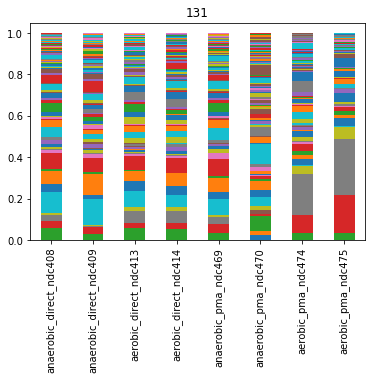

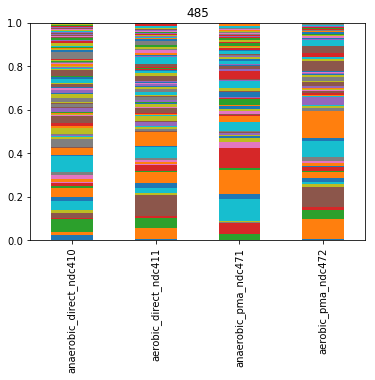

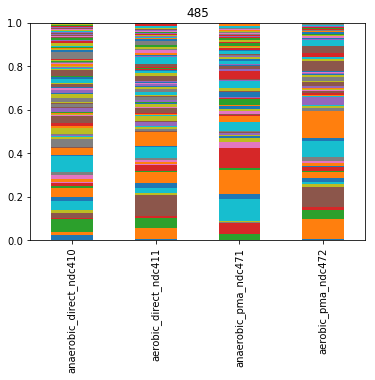

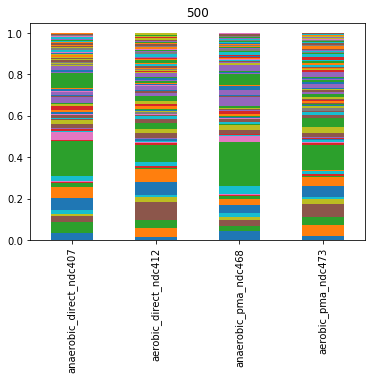

In [102]:
for donor in [131, 485, 500]:
    with PdfPages("donor_taxa_plots/{}_taxa.pdf".format(donor)) as pp:  
        df = taxa_composition(seq_freq_abundance, metadata, "donor_taxa_plots/{}_taxa.pdf".format(donor), donor)
        df.plot(kind="bar", stacked=True, title=str(int(donor)), legend=False )  
        pp.savefig()

In [74]:
max(seq_freq_abundance.loc["ndc407"])

0.17033372948318526

In [73]:
max(seq_freq_abundance.loc["ndc408"])

0.098437338300734797